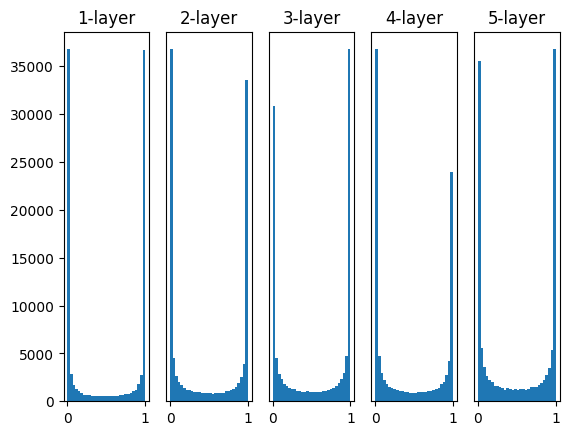

In [1]:
# coding: utf-8
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수 선언
# Sigmoid 함수는 입력을 0과 1 사이의 값으로 변환하는 비선형 함수로,
# 출력 값이 항상 0에서 1 사이의 실수가 되어, 뉴런의 활성화 여부를 결정
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU 함수 선언
# ReLU (Rectified Linear Unit) 함수는 입력이 0보다 작으면 0을 출력하고,
# 0보다 크면 그대로 출력하는 함수로, 신경망에서 많이 사용됨
def ReLU(x):
    return np.maximum(0, x)

# tanh 함수 선언
# tanh 함수는 입력 값을 -1과 1 사이의 값으로 변환하며, 신경망에서 활성화 함수로 사용됨
def tanh(x):
    return np.tanh(x)

# 입력 데이터 생성
# 1000개의 데이터 샘플을 생성하고, 각 샘플은 100개의 특성을 가짐
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수, 즉 각 은닉층에서 100개의 노드가 있음
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 각 은닉층의 활성화 결과를 저장할 딕셔너리

x = input_data  # 입력 데이터를 변수 x에 저장

# 은닉층을 순차적으로 처리하는 루프
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]  # 이전 층의 활성화 값을 다음 층의 입력으로 사용

    # 가중치 초기값 설정 방법 비교
    # 가중치 w를 가우시안 분포로부터 무작위로 생성
    # 가중치 초기값을 설정할 때 표준편차를 어떻게 설정하는지에 따라 성능에 영향을 줄 수 있음
    # 아래 예시는 다양한 가중치 초기화 방법을 비교하는 부분
    w = np.random.randn(node_num, node_num) * 1  # 표준편차 1인 가우시안 분포로 초기화
    # w = np.random.randn(node_num, node_num) * 0.01  # 표준편차 0.01인 가우시안 분포로 초기화
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)  # Xavier 초기값
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)  # He 초기값

    # 입력 값과 가중치 w의 행렬 곱을 계산하여 뉴런의 총 입력값을 구함
    a = np.dot(x, w)

    # 활성화 함수 적용 (Sigmoid 함수)
    # 활성화 함수는 뉴런의 출력값을 결정하는 함수로,
    # 여기서는 Sigmoid 함수를 사용하지만, ReLU나 tanh로 쉽게 바꿀 수 있음
    z = sigmoid(a)  # Sigmoid 함수 적용
    # z = ReLU(a)   # ReLU 함수로 변경 가능
    # z = tanh(a)   # tanh 함수로 변경 가능

    activations[i] = z  # 활성화 결과를 딕셔너리에 저장

# 히스토그램 그리기
# 각 은닉층에서의 활성화 결과 값을 히스토그램으로 시각화
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)  # 각 층에 대해 subplot 생성
    plt.title(str(i+1) + "-layer")  # 그래프 제목을 "n-layer" 형식으로 설정
    if i != 0: plt.yticks([], [])  # 첫 번째 히스토그램을 제외한 나머지는 y축 눈금을 제거
    # plt.xlim(0.1, 1)  # 그래프의 x축 범위를 지정 (옵션)
    # plt.ylim(0, 7000)  # 그래프의 y축 범위를 지정 (옵션)
    plt.hist(a.flatten(), 30, range=(0,1))  # 활성화 함수의 결과를 히스토그램으로 표현
plt.show()  # 히스토그램을 화면에 표시
